# Assignment 1: 2~5

Description:
Find out and create a data set of dairy or weekly or monthly data for more  than 120 data points (if you choose monthly, it means 10 years (12×10) ) of more than 100  financial assets including individual equity/equity index. It would be your database for the  coming term.  
Analyze a dataset of your choice (do NOT overlap the dataset each other among seminar members) based upon the learning from Chapter 2 to 5. You should include almost all concepts such as regressions, copulas, portfolio theory, statistical inference, hypothesis, Goodness of Fit, and parameter stability tests in the paper.

# Covered Processes: 
## Import Data to Excel, Summary Statistics, OLS Regression, Correlation Heatmap, Correlation Matrix, Minimum Variance Efficient Frontier, Chow Statistic, Breusch-Pagan Test, Ramsey-Reset Test

In [9]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = [
    'VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','2015.HK','1024.HK','9961.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','9868.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','600519.SS','600036.SS','300750.SZ','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','JIOFIN.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS','GRASIM.NS','WIPRO.NS','BEL.NS','JSWSTEEL.NS','TATACONSUM.NS','BRITANNIA.NS','MAXHEALTH.NS','LTIM.NS','ZOMATO.NS','EICHERMOT.NS','VBL.NS','COALINDIA.NS','VIPS','GGBR4.SA','HAPV3.SA','VBBR3.SA','6618.HK','0858.HK','0267.HK','1171.HK','1801.HK','0285.HK','2359.HK','3328.HK','TME','DIVISLAB.NS','ADANIPORTS.NS','ADANIENT.NS','GODREJCP.NS','PIDILITIND.NS','TRENT.NS','TATAPOWER.NS'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-10-01'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Export the data to an Excel file
excel_file = '/Users/khizarbilal/Desktop/MSCIBCIETF2.xlsx'
stock_data.to_excel(excel_file, index=True, engine='openpyxl')

print(f"Data exported to {excel_file}")

Data exported to /Users/khizarbilal/Desktop/MSCIBCIETF2.xlsx


In [10]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = [
    'VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','2015.HK','1024.HK','9961.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','9868.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','600519.SS','600036.SS','300750.SZ','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','JIOFIN.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS','GRASIM.NS','WIPRO.NS','BEL.NS','JSWSTEEL.NS','TATACONSUM.NS','BRITANNIA.NS','MAXHEALTH.NS','LTIM.NS','ZOMATO.NS','EICHERMOT.NS','VBL.NS','COALINDIA.NS','VIPS','GGBR4.SA','HAPV3.SA','VBBR3.SA','6618.HK','0858.HK','0267.HK','1171.HK','1801.HK','0285.HK','2359.HK','3328.HK','TME','DIVISLAB.NS','ADANIPORTS.NS','ADANIENT.NS','GODREJCP.NS','PIDILITIND.NS','TRENT.NS','TATAPOWER.NS'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-10-01'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Set column names to the stock tickers
stock_data.columns = tickers

# Export the data to an Excel file
excel_file = '/Users/khizarbilal/Desktop/MSCIBCIETF3.xlsx'
stock_data.to_excel(excel_file, index=True, engine='openpyxl')

print(f"Data exported to {excel_file}")

Data exported to /Users/khizarbilal/Desktop/MSCIBCIETF3.xlsx


In [11]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the Excel file
file_path = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract date and stock price columns
dates = df['date']
stock_data = df.iloc[:, 1:]  # Assuming the stock data starts from the second column

# Calculate summary statistics
summary_stats = pd.DataFrame()
summary_stats['Stock'] = stock_data.columns
summary_stats['Mean'] = stock_data.mean()
summary_stats['Std Dev'] = stock_data.std()
summary_stats['Skew'] = stock_data.apply(skew)
summary_stats['Kurtosis'] = stock_data.apply(kurtosis)

# Print or save the summary statistics
print(summary_stats)

KeyError: 'date'

In [12]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the Excel file
file_path = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract date and stock price columns
dates = df['date']
stock_data = df.iloc[:, 1:]  # Assuming the stock data starts from the second column

# Calculate summary statistics
summary_stats = pd.DataFrame()
summary_stats['Stock'] = stock_data.columns
summary_stats['Mean'] = stock_data.mean()
summary_stats['Std Dev'] = stock_data.std()
summary_stats['Skew'] = stock_data.apply(skew)
summary_stats['Kurtosis'] = stock_data.apply(kurtosis)

# Print or save the summary statistics
print(summary_stats)

            Stock  Mean  Std Dev  Skew  Kurtosis
0        VALE3.SA   NaN      NaN   NaN       NaN
1        PETR4.SA   NaN      NaN   NaN       NaN
2        PETR3.SA   NaN      NaN   NaN       NaN
3        ITUB4.SA   NaN      NaN   NaN       NaN
4        BBDC4.SA   NaN      NaN   NaN       NaN
..            ...   ...      ...   ...       ...
95     SBILIFE.NS   NaN      NaN   NaN       NaN
96        ONGC.NS   NaN      NaN   NaN       NaN
97    CHOLAFIN.NS   NaN      NaN   NaN       NaN
98  SHRIRAMFIN.NS   NaN      NaN   NaN       NaN
99  APOLLOHOSP.NS   NaN      NaN   NaN       NaN

[100 rows x 5 columns]


In [13]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the Excel file
file_path = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with the actual file path

try:
    df = pd.read_excel(file_path)
except Exception as e:
    print(f"Error reading the Excel file: {str(e)}")
    exit()

# Check if 'date' column exists and is of datetime data type
if 'date' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df['date']):
    print("Error: 'date' column not found or not in datetime format.")
    exit()

# Extract stock price columns
stock_data = df.drop(columns=['date'])

# Calculate summary statistics
summary_stats = pd.DataFrame()
summary_stats['Stock'] = stock_data.columns
summary_stats['Mean'] = stock_data.mean()
summary_stats['Std Dev'] = stock_data.std()
summary_stats['Skew'] = stock_data.apply(skew)
summary_stats['Kurtosis'] = stock_data.apply(kurtosis)

# Print or save the summary statistics
print(summary_stats)

            Stock  Mean  Std Dev  Skew  Kurtosis
0        VALE3.SA   NaN      NaN   NaN       NaN
1        PETR4.SA   NaN      NaN   NaN       NaN
2        PETR3.SA   NaN      NaN   NaN       NaN
3        ITUB4.SA   NaN      NaN   NaN       NaN
4        BBDC4.SA   NaN      NaN   NaN       NaN
..            ...   ...      ...   ...       ...
95     SBILIFE.NS   NaN      NaN   NaN       NaN
96        ONGC.NS   NaN      NaN   NaN       NaN
97    CHOLAFIN.NS   NaN      NaN   NaN       NaN
98  SHRIRAMFIN.NS   NaN      NaN   NaN       NaN
99  APOLLOHOSP.NS   NaN      NaN   NaN       NaN

[100 rows x 5 columns]


In [14]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the Excel file
file_path = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with the actual file path

try:
    df = pd.read_excel(file_path)
except Exception as e:
    print(f"Error reading the Excel file: {str(e)}")
    exit()

# Check if 'date' column exists and is of datetime data type
if 'date' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df['date']):
    print("Error: 'date' column not found or not in datetime format.")
    exit()

# Extract stock price columns
stock_data = df.drop(columns=['date'])

# Calculate summary statistics
summary_stats = pd.DataFrame()
summary_stats['Stock'] = stock_data.columns
summary_stats['Mean'] = stock_data.mean()
summary_stats['Std Dev'] = stock_data.std()
summary_stats['Skew'] = stock_data.apply(skew)
summary_stats['Kurtosis'] = stock_data.apply(kurtosis)

# Print or save the summary statistics
print(summary_stats)

            Stock  Mean  Std Dev  Skew  Kurtosis
0        VALE3.SA   NaN      NaN   NaN       NaN
1        PETR4.SA   NaN      NaN   NaN       NaN
2        PETR3.SA   NaN      NaN   NaN       NaN
3        ITUB4.SA   NaN      NaN   NaN       NaN
4        BBDC4.SA   NaN      NaN   NaN       NaN
..            ...   ...      ...   ...       ...
95     SBILIFE.NS   NaN      NaN   NaN       NaN
96        ONGC.NS   NaN      NaN   NaN       NaN
97    CHOLAFIN.NS   NaN      NaN   NaN       NaN
98  SHRIRAMFIN.NS   NaN      NaN   NaN       NaN
99  APOLLOHOSP.NS   NaN      NaN   NaN       NaN

[100 rows x 5 columns]


In [15]:
import pandas as pd
import statsmodels.api as sm

# Load the Excel file
file_path = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Extract the dates (assuming 'date' is the column name for dates)
dates = df['date']

# Extract all the stock prices into a DataFrame
stock_prices = df.drop(columns=['date'])

# Add a constant (intercept) term to the independent variables
X = sm.add_constant(stock_prices)

# Create the dependent variable (Y) as the first stock price (you can choose a specific stock)
# Here, we'll use the first stock in the dataset
Y = stock_prices.iloc[:, 0]

# Perform multiple linear regression
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               VALE3.SA   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.104e+23
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          9.92e-219
Time:                        21:30:15   Log-Likelihood:                 2885.1
No. Observations:                 120   AIC:                            -5568.
Df Residuals:                      19   BIC:                            -5287.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.387e-11   1.39e-09      0.010

In [16]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = [
    '^CRSLDX'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-10-01'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Set column names to the stock tickers
stock_data.columns = tickers

# Export the data to an Excel file
excel_file = '/Users/khizarbilal/Desktop/nifty500.xlsx'
stock_data.to_excel(excel_file, index=True, engine='openpyxl')

print(f"Data exported to {excel_file}")

Data exported to /Users/khizarbilal/Desktop/nifty500.xlsx


In [17]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = [
    '^BVSP'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-10-01'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Set column names to the stock tickers
stock_data.columns = tickers

# Export the data to an Excel file
excel_file = '/Users/khizarbilal/Desktop/nifty500.xlsx'
stock_data.to_excel(excel_file, index=True, engine='openpyxl')

print(f"Data exported to {excel_file}")

Data exported to /Users/khizarbilal/Desktop/nifty500.xlsx


In [18]:
# Define the list of stock tickers
tickers = [
    '000300.SS'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-10-01'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Set column names to the stock tickers
stock_data.columns = tickers

# Specify the existing Excel file and the sheet name
excel_file = '/Users/khizarbilal/Desktop/nifty500.xlsx'
sheet_name = 'CSI300'  # Change this to the desired sheet name

# Create a Pandas Excel writer using openpyxl engine
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    writer.book = writer.book  # Load existing workbook
    stock_data.to_excel(writer, sheet_name=sheet_name, index=True)

print(f"Data exported to the sheet '{sheet_name}' in the Excel file '{excel_file}'")

Data exported to the sheet 'CSI300' in the Excel file '/Users/khizarbilal/Desktop/nifty500.xlsx'


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2999678299.py:47: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = writer.book  # Load existing workbook


In [19]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = [
    '^GSPC'
]

# Define the date range
start_date = '2021-04-01'
end_date = '2023-07-16'

# Create an empty list to store DataFrames for each ticker
stock_data_list = []

# Fetch the stock price data for each ticker
for ticker in tickers:
    try:
        # Download historical data
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Check if data is empty or contains only NaN values
        if stock.empty or stock['Adj Close'].isna().all():
            print(f"No data available for {ticker}. Skipping.")
            continue
        
        # Set the index to a DatetimeIndex
        stock.index = pd.to_datetime(stock.index)
        
        # Calculate weekly averages
        stock_weekly = stock.resample('W').mean()
        
        # Store the DataFrame in the list
        stock_data_list.append(stock_weekly['Adj Close'])
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")

# Concatenate the list of DataFrames into a single DataFrame
stock_data = pd.concat(stock_data_list, axis=1)

# Set column names to the stock tickers
stock_data.columns = tickers

# Export the data to an Excel file
excel_file = '/Users/khizarbilal/Desktop/s&p500.xlsx'
stock_data.to_excel(excel_file, index=True, engine='openpyxl')

print(f"Data exported to {excel_file}")

Data exported to /Users/khizarbilal/Desktop/s&p500.xlsx


In [22]:
import pandas as pd

# Load historical price data from Excel
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'ALL'  # Replace with your sheet name
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Assuming your Excel sheet has a 'Date' column and multiple price columns you want to convert to log returns

# Specify the columns you want to convert to log returns (adjust as needed)
columns_to_convert = ['s&p500','nifty500','ibovespa','CSI 300','VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','1024.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS']

# Calculate log returns for each selected column and add them as new columns
for column_name in columns_to_convert:
    df[column_name + '_Log_Return'] = df[column_name].pct_change().apply(
        lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
    )

# Drop rows with NaN values (typically the first row with no return)
df = df.dropna()

# Save the updated DataFrame with log returns to a new Excel file
output_file = '/Users/khizarbilal/Desktop/mscilogr.xlsx'  # Replace with your desired output file path
df.to_excel(output_file, index=False)

print(f"Log returns calculated and saved to {output_file}")

/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2369113503.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2369113503.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2369113503.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2369113503.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy dire

Log returns calculated and saved to /Users/khizarbilal/Desktop/mscilogr.xlsx


In [23]:
import pandas as pd

# Load historical price data from Excel
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'ALL'  # Replace with your sheet name
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Assuming your Excel sheet has a 'Date' column and multiple price columns you want to convert to log returns

# Specify the columns you want to convert to log returns (adjust as needed)
columns_to_convert = ['s&p500','nifty500','ibovespa','CSI 300','VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','1024.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS']

# Create a new DataFrame to store log returns
log_returns_df = pd.DataFrame()

# Calculate log returns for each selected column and add them to the new DataFrame
for column_name in columns_to_convert:
    log_returns_df[column_name + '_Log_Return'] = df[column_name].pct_change().apply(
        lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
    )

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, log_returns_df], axis=1)

# Drop rows with NaN values (typically the first row with no return)
df = df.dropna()

# Save the updated DataFrame with log returns to a new Excel file
output_file = 'log_returns.xlsx'  # Replace with your desired output file path
df.to_excel(output_file, index=False)

print(f"Log returns calculated and saved to {output_file}")


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2529803529.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2529803529.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2529803529.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/2529803529.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy dire

Log returns calculated and saved to log_returns.xlsx


In [24]:
import pandas as pd

# Load historical price data from Excel
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'ALL'  # Replace with your sheet name
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Assuming your Excel sheet has a 'Date' column and multiple price columns you want to convert to log returns

# Specify the columns you want to convert to log returns (adjust as needed)
columns_to_convert = ['s&p500','nifty500','ibovespa','CSI 300','VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','1024.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS']

# Create a new DataFrame to store log returns
log_returns_df = pd.DataFrame()

# Calculate log returns for each selected column and add them to the new DataFrame
for column_name in columns_to_convert:
    log_returns_df[column_name + '_Log_Return'] = df[column_name].pct_change().apply(
        lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
    )

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, log_returns_df], axis=1)

# Drop rows with NaN values (typically the first row with no return)
df = df.dropna()

# Save the updated DataFrame with log returns to a new Excel file
output_file = '/Users/khizarbilal/Desktop/log_returns.xlsx'  # Replace with your desired output file path
df.to_excel(output_file, index=False)

print(f"Log returns calculated and saved to {output_file}")

/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/428397809.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/428397809.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/428397809.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/428397809.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly

Log returns calculated and saved to /Users/khizarbilal/Desktop/log_returns.xlsx


In [25]:
import pandas as pd

# Load historical price data from Excel
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'ALL'  # Replace with your sheet name
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Assuming your Excel sheet has a 'Date' column and multiple price columns you want to convert to log returns

# Specify the columns you want to convert to log returns (adjust as needed)
columns_to_convert = ['s&p500','nifty500','ibovespa','CSI 300','VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','1024.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS']

# Calculate log returns for each selected column
log_returns_df = df[columns_to_convert].pct_change().applymap(
    lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
)

# Rename the columns in log_returns_df to include '_Log_Return'
log_returns_df.columns = [col + '_Log_Return' for col in log_returns_df.columns]

# Concatenate log_returns_df with the original DataFrame
df = pd.concat([df, log_returns_df], axis=1)

# Drop rows with NaN values (typically the first row with no return)
df = df.dropna()

# Save the updated DataFrame with log returns to a new Excel file
output_file = '/Users/khizarbilal/Desktop/log_returns1.xlsx'  # Replace with your desired output file path
df.to_excel(output_file, index=False)

print(f"Log returns calculated and saved to {output_file}")

/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3212547804.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)


Log returns calculated and saved to /Users/khizarbilal/Desktop/log_returns1.xlsx


In [26]:
import pandas as pd

# Load historical price data from Excel
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'ALL'  # Replace with your sheet name
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Assuming your Excel sheet has a 'Date' column and multiple price columns you want to convert to log returns

# Specify the columns you want to convert to log returns (adjust as needed)
columns_to_convert = ['s&p500','nifty500','ibovespa','CSI 300','VALE3.SA','PETR4.SA','PETR3.SA','ITUB4.SA','BBDC4.SA','B3SA3.SA','ABEV3.SA','WEGE3.SA','RENT3.SA','SUZB3.SA','ELET3.SA','ITSA4.SA','BBAS3.SA','BPAC11.SA','PRIO3.SA','RADL3.SA','EQTL3.SA','RAIL3.SA','0700.HK','9988.HK','3690.HK','0939.HK','9999.HK','9888.HK','2318.HK','9618.HK','1211.HK','1398.HK','3988.HK','1810.HK','2269.HK','1024.HK','3968.HK','0857.HK','2020.HK','1109.HK','0386.HK','2628.HK','1288.HK','2331.HK','2319.HK','2328.HK','0291.HK','1088.HK','6160.HK','9633.HK','2899.HK','9901.HK','0992.HK','0688.HK','2313.HK','6690.HK','0175.HK','2688.HK','0168.HK','2601.HK','1093.HK','PDD','HTHT','YUMC','NIO','BEKE','ZTO','RELIANCE.NS','ICICIBANK.NS','INFY.NS','HDFCBANK.NS','TCS.NS','AXISBANK.NS','BAJFINANCE.NS','LT.NS','BHARTIARTL.NS','HINDUNILVR.NS','KOTAKBANK.NS','M&M.NS','MARUTI.NS','ITC.NS','ASIANPAINT.NS','HCLTECH.NS','TITAN.NS','SUNPHARMA.NS','SBIN.NS','TATAMOTORS.NS','NTPC.NS','ULTRACEMCO.NS','TATASTEEL.NS','POWERGRID.NS','NESTLEIND.NS','TECHM.NS','HDFCLIFE.NS','BAJAJFINSV.NS','DMART.NS','CIPLA.NS','HINDALCO.NS','DRREDDY.NS','SBILIFE.NS','ONGC.NS','CHOLAFIN.NS','SHRIRAMFIN.NS','APOLLOHOSP.NS']

# Calculate log returns for each selected column
log_returns_df = df[columns_to_convert].pct_change().applymap(
    lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)
)

# Rename the columns in log_returns_df to include '_Log_Return'
log_returns_df.columns = [col + '_Log_Return' for col in columns_to_convert]

# Concatenate log_returns_df with the original DataFrame
df = pd.concat([df, log_returns_df], axis=1)

# Drop rows with NaN values (typically the first row with no return)
df = df.dropna()

# Save the updated DataFrame with log returns to a new Excel file
output_file = '/Users/khizarbilal/Desktop/log_returns2.xlsx'  # Replace with your desired output file path
df.to_excel(output_file, index=False)

print(f"Log returns calculated and saved to {output_file}")


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3529627505.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  lambda x: 0 if pd.isna(x) else pd.np.log(1 + x)


Log returns calculated and saved to /Users/khizarbilal/Desktop/log_returns2.xlsx


In [27]:
import pandas as pd
import statsmodels.api as sm

# Load data from the Excel file
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'Indlog'  # Replace with your sheet name

# Load the data starting from the second row (assuming the first row contains headers)
df = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

# Specify the number of stocks (37 in your case)
num_stocks = 37

# Create an empty DataFrame to store CAPM beta results
capm_results = pd.DataFrame(columns=['Stock', 'CAPM Beta'])

# Loop through each stock's returns columns and calculate CAPM beta
for i in range(2, num_stocks + 2):  # Start from the third column (index 2)
    stock_name = df.columns[i]  # Get the stock name from the column header
    stock_returns = df.iloc[:, i]  # Get the stock's returns
    
    # Perform the CAPM regression
    X = sm.add_constant(df.iloc[:, 1])  # Market index returns
    Y = stock_returns
    
    model = sm.OLS(Y, X).fit()
    
    # Extract the CAPM beta (slope coefficient) from the regression results
    capm_beta = model.params[1]
    
    # Append results to the DataFrame
    capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)

# Print or save the CAPM beta results
print(capm_results)

       Stock  CAPM Beta
0  -0.020692  -0.073599
1  -0.032421  -0.254086
2  -0.019817  -0.110513
3  -0.029930  -0.128102
4  -0.022345   0.159450
5  -0.028344  -0.231697
6  -0.032234  -0.094694
7  -0.074439  -0.231175
8  -0.031254  -0.188024
9  -0.006311  -0.275323
10  0.018245  -0.000525
11 -0.009297   0.123031
12  0.012297   0.025825
13 -0.022366  -0.259531
14 -0.028117  -0.030540
15 -0.000148  -0.569186
16 -0.036391  -0.367770
17 -0.010012  -0.348366
18  0.017959  -0.027754
19 -0.046624  -0.033732
20 -0.032149  -0.330678
21 -0.041344   0.651333
22 -0.033684  -0.548462
23 -0.005577  -0.464652
24 -0.016075   0.560687
25 -0.007605  -0.133091
26 -0.003359  -0.337283
27 -0.000669   0.118808
28  0.007152  -0.363106
29 -0.006589  -0.037712
30  0.074824  -0.091511
31 -0.010727  -0.293331
32  0.045008  -0.383854
33 -0.003503  -0.008807
34 -0.007391   0.471172
35 -0.049437  -0.420028
36 -0.071810  -0.123573


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3813766715.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3813766715.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3813766715.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn

In [28]:
import pandas as pd
import statsmodels.api as sm

# Load data from the Excel file
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'Chinlog'  # Replace with your sheet name

# Load the data starting from the second row (assuming the first row contains headers)
df = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

# Specify the number of stocks (45)
num_stocks = 45

# Create an empty DataFrame to store CAPM beta results
capm_results = pd.DataFrame(columns=['Stock', 'CAPM Beta'])

# Loop through each stock's returns columns and calculate CAPM beta
for i in range(1, num_stocks + 1):  # Start from the third column (index 2)
    stock_name = df.columns[i]  # Get the stock name from the column header
    stock_returns = df.iloc[:, i]  # Get the stock's returns
    
    # Perform the CAPM regression
    X = sm.add_constant(df.iloc[:, 1])  # Market index returns
    Y = stock_returns
    
    model = sm.OLS(Y, X).fit()
    
    # Extract the CAPM beta (slope coefficient) from the regression results
    capm_beta = model.params[1]
    
    # Append results to the DataFrame
    capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)

# Print or save the CAPM beta results
print(capm_results)

       Stock  CAPM Beta
0  -0.007477   1.000000
1  -0.048026   1.570247
2  -0.020601   1.870242
3  -0.025491   2.064404
4  -0.000511   0.361783
5  -0.021760   1.442712
6   0.005181   1.826720
7  -0.011989   1.559090
8  -0.048136   1.746794
9  -0.003009   1.717670
10 -0.012670   0.276344
11  0.011236   0.240242
12 -0.014599   1.496843
13  0.001585   2.280409
14 -0.037417   1.972849
15 -0.013905   1.605044
16 -0.014389   0.511927
17  0.013437   1.271825
18 -0.009453   1.077860
19 -0.015304   0.387144
20 -0.012051   1.093338
21 -0.011822   0.376680
22  0.054322   1.720695
23 -0.001484   0.811422
24  0.016431   0.572772
25 -0.006222   1.434397
26 -0.004588   0.606650
27 -0.100158   1.778794
28 -0.032057   0.914407
29  0.050853   1.092732
30  0.006834   2.822087
31 -0.057159   0.723975
32 -0.015633   0.950098
33  0.015595   1.463207
34  0.019447   1.292859
35  0.003239   1.675459
36  0.016660   0.885955
37  0.025194   1.165817
38 -0.077778   1.407753
39  0.018988   0.761333
40 -0.018088   2

/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3553552334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3553552334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/3553552334.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn

In [29]:
import pandas as pd
import statsmodels.api as sm

# Load data from the Excel file
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  # Replace with your file path
sheet_name = 'Bralog'  # Replace with your sheet name

# Load the data starting from the second row (assuming the first row contains headers)
df = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

# Specify the number of stocks (45)
num_stocks = 18

# Create an empty DataFrame to store CAPM beta results
capm_results = pd.DataFrame(columns=['Stock', 'CAPM Beta'])

# Loop through each stock's returns columns and calculate CAPM beta
for i in range(1, num_stocks + 1):  # Start from the third column (index 2)
    stock_name = df.columns[i]  # Get the stock name from the column header
    stock_returns = df.iloc[:, i]  # Get the stock's returns
    
    # Perform the CAPM regression
    X = sm.add_constant(df.iloc[:, 1])  # Market index returns
    Y = stock_returns
    
    model = sm.OLS(Y, X).fit()
    
    # Extract the CAPM beta (slope coefficient) from the regression results
    capm_beta = model.params[1]
    
    # Append results to the DataFrame
    capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)

# Print or save the CAPM beta results
print(capm_results)

       Stock  CAPM Beta
0   0.021220   1.000000
1   0.060848   0.806803
2  -0.000335   1.206009
3   0.001354   1.243445
4  -0.005254   0.999746
5  -0.010702   1.064986
6   0.027087   1.529687
7   0.022283   0.501843
8   0.018061   0.639544
9   0.041371   1.226009
10  0.014081   0.267321
11  0.050588   1.004253
12  0.002176   0.956420
13 -0.017719   1.092210
14  0.044353   1.374753
15  0.028284   1.097967
16 -0.000817   0.771408
17 -0.003367   0.641458


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/233613412.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/233613412.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_2233/233613412.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  capm_results = capm_results.append({'Stock': stock_name, 'CAPM Beta': capm_beta}, ignore_index=True)
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/

In [30]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  
sheet_name = 'ALL'  

data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

print(data['s&p500'].mean(), data['nifty500'].mean(),data['ibovespa'].mean(), data['CSI 300'].mean())
print(data['s&p500'].std(), data['nifty500'].std(),data['ibovespa'].std(), data['CSI 300'].std())
print(data['s&p500'].skew(), data['nifty500'].skew(),data['ibovespa'].skew(), data['CSI 300'].skew())
print(data['s&p500'].kurtosis(), data['nifty500'].kurtosis(),data['ibovespa'].kurtosis(), data['CSI 300'].kurtosis())

KeyError: 's&p500'

In [31]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  
sheet_name = 'ALL'  

data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

print(data.columns)

Index([2021-04-04 00:00:00,     4019.8701171875,    12478.9833984375,
                    115253,      5136.169921875,   74.98129272460938,
          9.13090801239014,    9.71672058105469,   24.48873710632324,
         18.72842025756836,
       ...
         977.3327026367188,   2912.699951171875,   796.7677001953125,
         342.4461059570312,    4449.92041015625,   877.2539672851562,
         88.59490203857422,   557.4275512695312,    1376.09033203125,
          2869.96728515625],
      dtype='object', length=105)


In [32]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  
sheet_name = 'ALL'  

data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

print(data.columns)

Index(['date', 's&p500', 'nifty500', 'ibovespa', 'CSI 300', 'VALE3.SA',
       'PETR4.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA',
       ...
       'BAJAJFINSV.NS', 'DMART.NS', 'CIPLA.NS', 'HINDALCO.NS', 'DRREDDY.NS',
       'SBILIFE.NS', 'ONGC.NS', 'CHOLAFIN.NS', 'SHRIRAMFIN.NS',
       'APOLLOHOSP.NS'],
      dtype='object', length=105)


In [33]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'  
sheet_name = 'ALL'  

data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

print(data['s&p500'].mean(), data['nifty500'].mean(),data['ibovespa'].mean(), data['CSI 300'].mean())
print(data['s&p500'].std(), data['nifty500'].std(),data['ibovespa'].std(), data['CSI 300'].std())
print(data['s&p500'].skew(), data['nifty500'].skew(),data['ibovespa'].skew(), data['CSI 300'].skew())
print(data['s&p500'].kurtosis(), data['nifty500'].kurtosis(),data['ibovespa'].kurtosis(), data['CSI 300'].kurtosis())

4204.749280598958 14660.469781494141 111896.6275 4399.358528476291
271.0456444143834 969.0644634243588 7489.949826491167 487.010615433257
0.05815749780042282 -0.7003417597174708 0.40099582022964714 0.30786393764101033
-0.7477413823094823 0.09613636568974915 -0.3285369184752671 -1.433683849325867


In [35]:
#Correlation
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 's&p500'
column2 = 'nifty500'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 's&p500' and 'nifty500': 0.5587771082054678


In [36]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 's&p500'
column2 = 'ibovespa'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 's&p500' and 'ibovespa': 0.3651183120108536


In [37]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 's&p500'
column2 = 'CSI 300'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 's&p500' and 'CSI 300': 0.20032645896230883


In [38]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 'CSI 300'
column2 = 'nifty500'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 'CSI 300' and 'nifty500': 0.14134871537435925


In [39]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 'CSI 300'
column2 = 'ibovespa'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 'CSI 300' and 'ibovespa': 0.10586426493997546


In [40]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column1 = 'nifty500'
column2 = 'ibovespa'

correlation = data[column1].corr(data[column2])

print(f"Correlation between '{column1}' and '{column2}': {correlation}")

Correlation between 'nifty500' and 'ibovespa': 0.30580724749284965


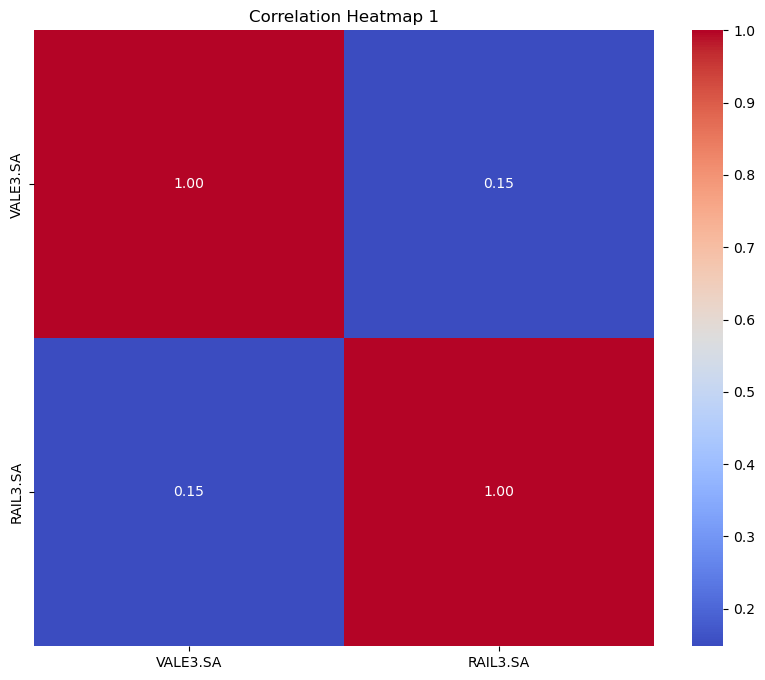

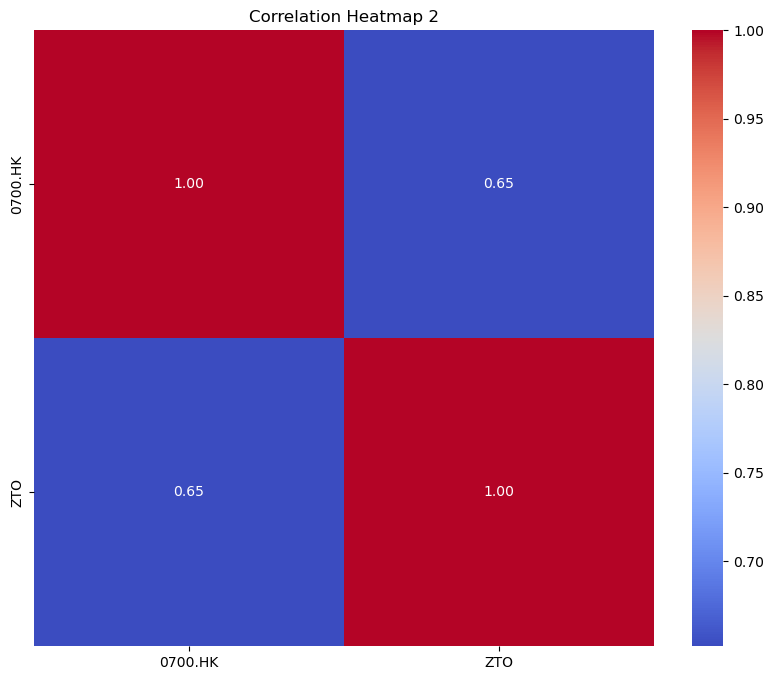

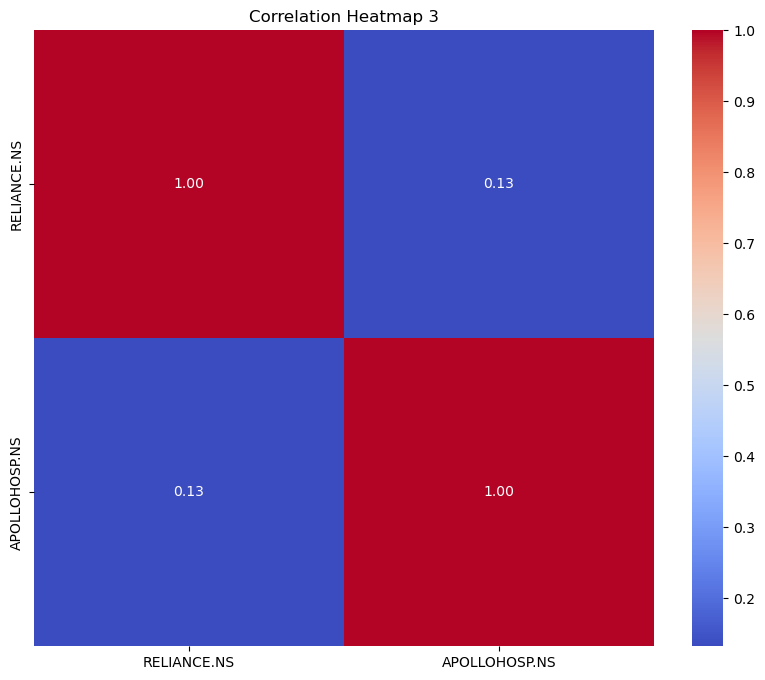

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret2'
data = pd.read_excel(excel_file, sheet_name=sheet_name, header=1)

column_ranges = [
    ['VALE3.SA', 'RAIL3.SA'],
    ['0700.HK', 'ZTO'],
    ['RELIANCE.NS', 'APOLLOHOSP.NS']
]

# Loop through column ranges and create heatmaps
for i, columns in enumerate(column_ranges, start=1):
    # Subset the DataFrame for the current column range
    subset_data = data[columns]
    
    # Calculate the correlation matrix
    correlation_matrix = subset_data.corr()
    
    # Create a new figure for each heatmap
    plt.figure(figsize=(10, 8))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    
    # Set the title
    plt.title(f"Correlation Heatmap {i}")
    
    # Display the heatmap
    plt.show()

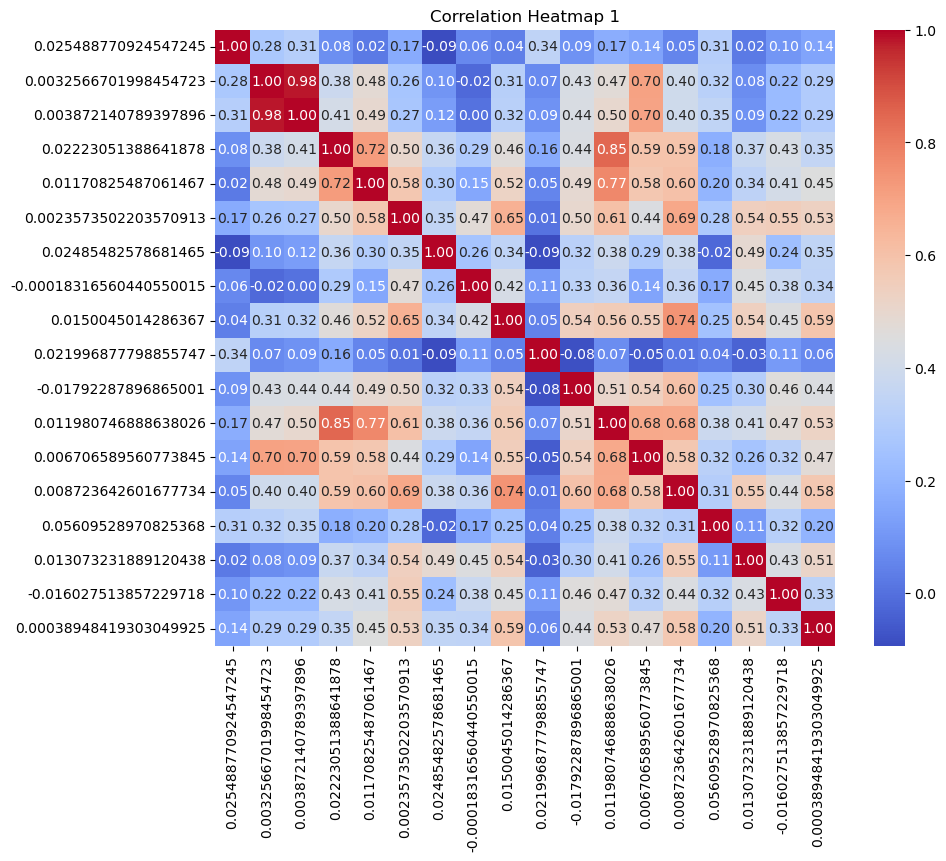

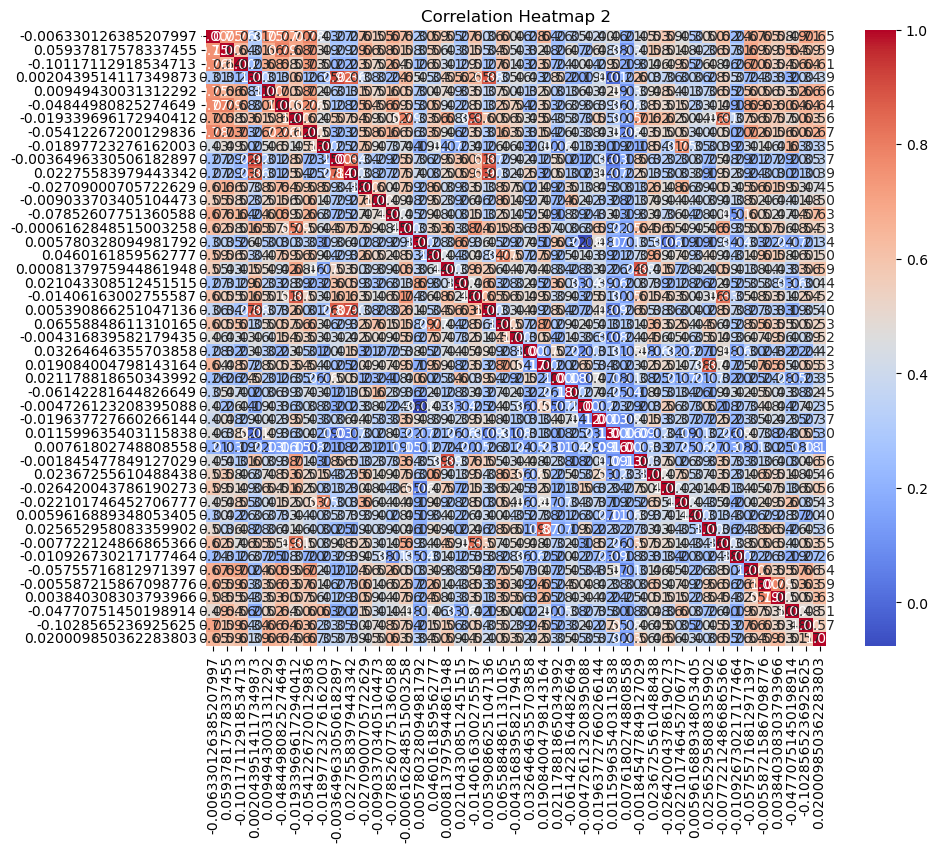

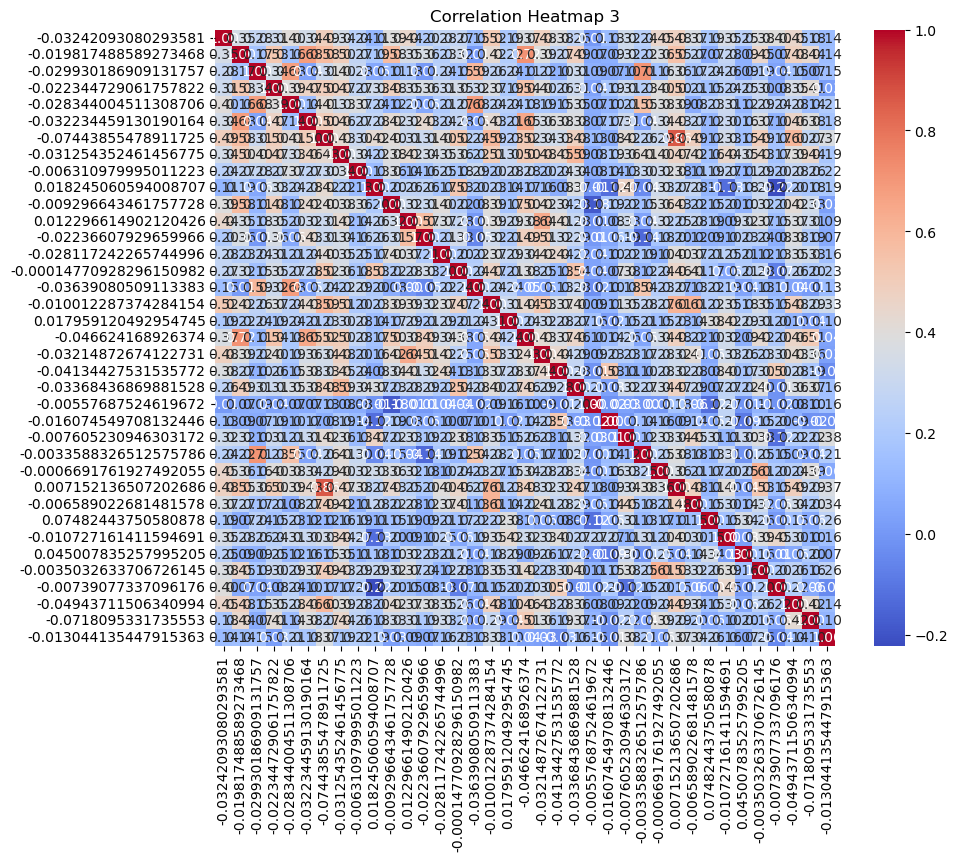

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret2'  # Update with your sheet name
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define column ranges
column_ranges = [
    ('VALE3.SA', 'RAIL3.SA'),   # Range 1: B2 to S2
    ('0700.HK', 'ZTO'),  # Range 2: T2 to BL2
    ('RELIANCE.NS', 'APOLLOHOSP.NS'), # Range 3: BM2 to CW2
]

# Loop through column ranges and create heatmaps
for i, (start_col, end_col) in enumerate(column_ranges, start=1):
    # Get the ticker names from the second row
    ticker_names = data.iloc[1, data.columns.get_loc(start_col):data.columns.get_loc(end_col)+1].tolist()
    
    # Subset the DataFrame for the current column range, excluding the second row
    subset_data = data.loc[2:, start_col:end_col]
    
    # Calculate the correlation matrix
    correlation_matrix = subset_data.corr()
    
    # Create a new figure for each heatmap
    plt.figure(figsize=(10, 8))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=ticker_names, yticklabels=ticker_names)
    
    # Set the title
    plt.title(f"Correlation Heatmap {i}")
    
    # Display the heatmap
    plt.show()

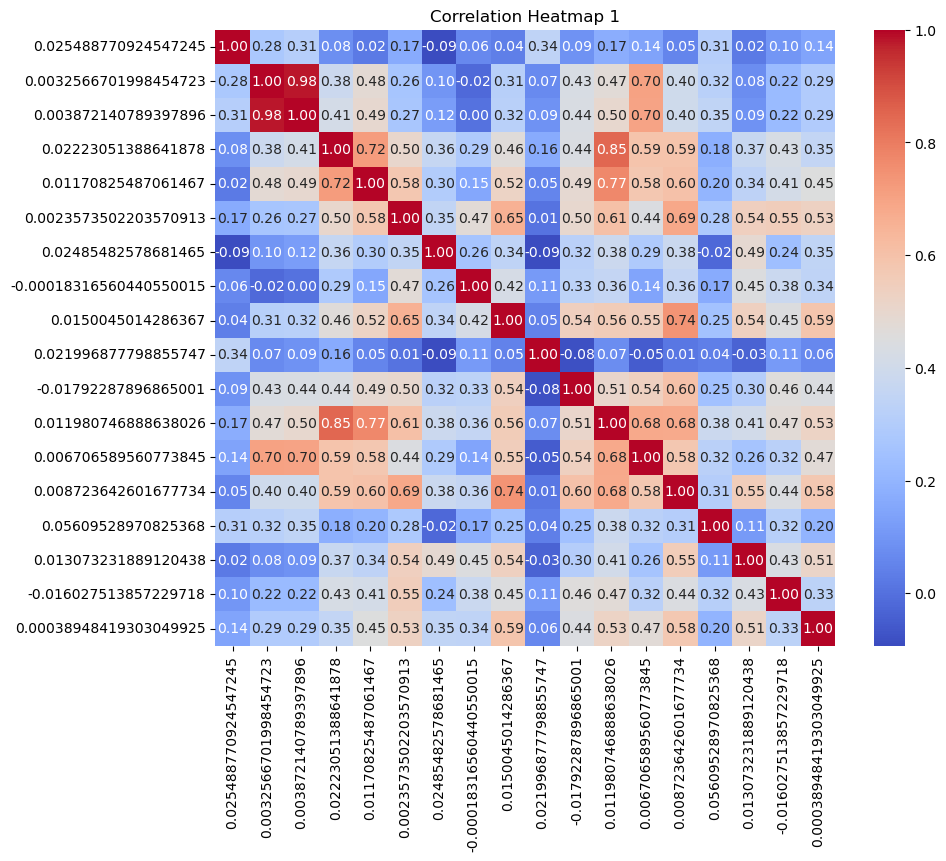

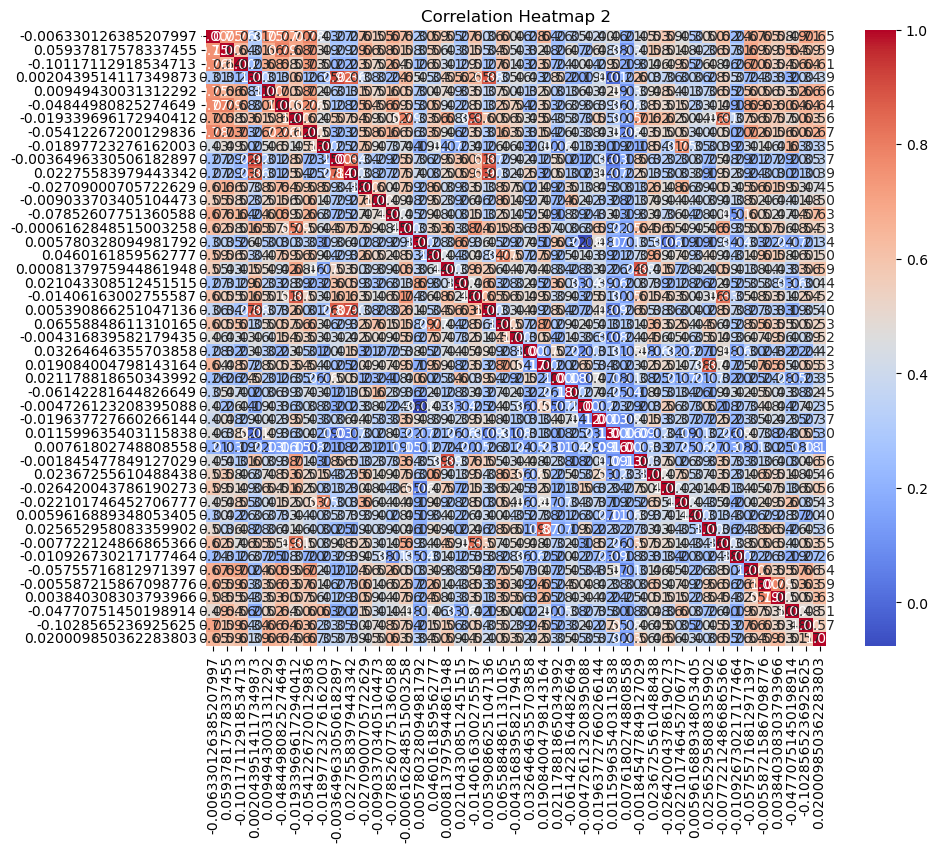

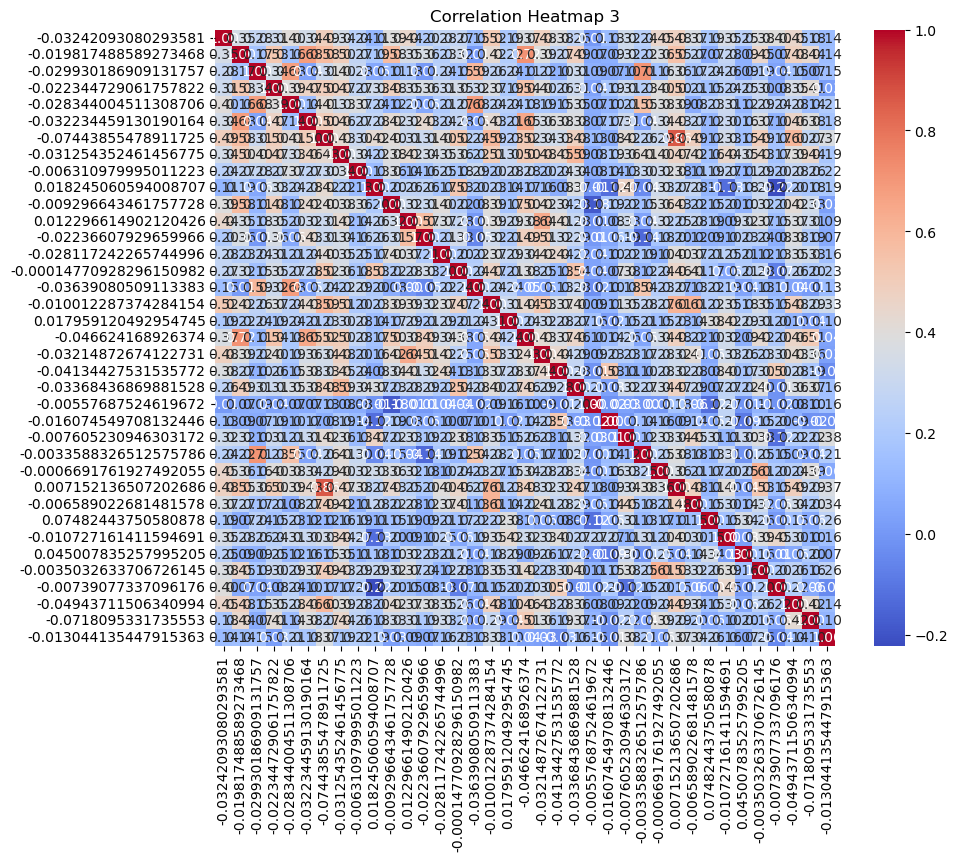

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret2'  # Update with your sheet name
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define column ranges
column_ranges = [
    ('VALE3.SA', 'RAIL3.SA'),   # Range 1: B2 to S2
    ('0700.HK', 'ZTO'),  # Range 2: T2 to BL2
    ('RELIANCE.NS', 'APOLLOHOSP.NS'), # Range 3: BM2 to CW2
]

# Loop through column ranges and create heatmaps
for i, (start_col, end_col) in enumerate(column_ranges, start=1):
    # Get the ticker names from the second row
    ticker_names = data.iloc[1, data.columns.get_loc(start_col):data.columns.get_loc(end_col)+1].tolist()
    
    # Subset the DataFrame for the current column range, excluding the second row
    subset_data = data.loc[2:, start_col:end_col]
    
    # Calculate the correlation matrix
    correlation_matrix = subset_data.corr()
    
    # Create a new figure for each heatmap
    plt.figure(figsize=(10, 8))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=ticker_names, yticklabels=ticker_names)
    
    # Set the title
    plt.title(f"Correlation Heatmap {i}")
    
    # Display the heatmap
    plt.show()

In [49]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'  # Update with your sheet name
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Specify the columns for regression
X = data['s&p500']  # Independent variable
y = data['nifty500']  # Dependent variable

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               nifty500   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     53.57
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.31e-11
Time:                        12:03:50   Log-Likelihood:                 339.89
No. Observations:                 120   AIC:                            -675.8
Df Residuals:                     118   BIC:                            -670.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.502      0.1

In [51]:
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'ALL'  # Update with your sheet name
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Specify the columns for regression
X = data['s&p500']  # Independent variable
y = data['nifty500']  # Dependent variable

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               nifty500   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.386
Date:                Fri, 06 Oct 2023   Prob (F-statistic):              0.125
Time:                        12:05:03   Log-Likelihood:                -993.73
No. Observations:                 120   AIC:                             1991.
Df Residuals:                     118   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.254e+04   1372.950      9.136      0.0

In [52]:
import pandas as pd
import statsmodels.api as sm

# Load the Excel file into a DataFrame
excel_file = '/Users/khizarbilal/Desktop/mscibic.xlsx'
sheet_name = 'Logret'  # Update with your sheet name
data = pd.read_excel(excel_file, sheet_name=sheet_name)

# Specify the columns for regression
y = data['nifty500']  # Dependent variable
X = data['s&p500']    # Independent variable

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(y, X).fit()

# Perform an F-test
f_test = model.f_test("s&p500 = 0")

# Print the F-test results
print("F-statistic:", f_test.fvalue)
print("p-value:", f_test.pvalue)

F-statistic: 53.56944697381356
p-value: 3.3058286601152734e-11


In [54]:
import numpy as np

# Define your list of log returns
log_returns = [-0.003016814, -0.020692392, -0.007762898, 0.025032624, 0.002886416, 0.011658828, 0.016893677, 0.017915304, 0.020582501, 0.01445834, 0.000453537, -0.001572728, 0.000873795, 0.006126944, 0.006611668, -0.003091624, 0.001199708, 0.02113122, 0.001623729, 0.007679614, 0.001529871, 0.035751365, 0.014816428, 0.011703152, 0.003355103, 0.003681306, 0.010718697, 0.021241817, 0.002715756, -0.019443913, 1.95386E-06, 0.012675174, -0.002955444, -0.030929063, -0.01435874, 0.011940781, -0.001839727, -0.025116534, 0.020107356, 0.029981914, 0.02051801, -0.009988897, -0.04879727, 0.025040138, -0.010710048, -0.017121548, -0.026511038, -0.012446974, -0.014169501, 0.036160949, 0.015522897, 0.012781783, 0.030868353, -0.00783705, -0.021211697, -0.005754476, -0.026501195, -0.050241685, 0.00444121, -0.001379074, 0.026358051, -0.013801019, -0.049536439, -0.008003886, 0.020579521, 0.015539806, 0.010595136, 0.02753612, 0.014154626, 0.035241364, 0.011682567, 0.017873872, -0.015057424, 0.005382858, 0.012397741, 0.011224612, -0.015356926, -0.040167768, 0.015016376, -0.007650217, 0.015751292, 0.010958435, 0.018513427, 0.004698565, 0.004053029, -0.003156387, 0.020345079, -0.000435278, -0.004533022, -0.020817738, -0.00329571, -0.001279393, -0.005593694, 0.00303509, -0.011602524, -0.021384196, 0.006314048, 0.001149395, -0.015385748, -0.010308659, 0.013779007, -0.030468742, -0.000187819, -0.002069211, 0.02381378, 0.013402892, -0.001007327, 0.010803777, 0.018474316, 0.009081352, -0.000486029, 0.007469684, 0.013948731, 0.0079936, 0.0094843, 0.005397548, 0.005378577, 0.021572505, 0.003502371, 0.003502371]

# Convert the list of log returns to a numpy array
log_returns_array = np.array(log_returns)

# Calculate the standard deviation
std_deviation = np.std(log_returns_array)

# Print the standard deviation
print("Standard Deviation of Log Returns:", std_deviation)


Standard Deviation of Log Returns: 0.017177041129940424


## Monthly return data for each stock
nifty500_returns = np.array([-0.003016814,-0.020692392,-0.007762898,0.025032624,0.002886416,0.011658828,0.016893677,0.017915304,0.020582501,0.01445834,0.000453537,-0.001572728,0.000873795,0.006126944,0.006611668,-0.003091624,0.001199708,0.02113122,0.001623729,0.007679614,0.001529871,0.035751365,0.014816428,0.011703152,0.003355103,0.003681306,0.010718697,0.021241817,0.002715756,-0.019443913,1.95386E-06,0.012675174,-0.002955444,-0.030929063,-0.01435874,0.011940781,-0.001839727,-0.025116534,0.020107356,0.029981914,0.02051801,-0.009988897,-0.04879727,0.025040138,-0.010710048,-0.017121548,-0.026511038,-0.012446974,-0.014169501,0.036160949,0.015522897,0.012781783,0.030868353,-0.00783705,-0.021211697,-0.005754476,-0.026501195,-0.050241685,0.00444121,-0.001379074,0.026358051,-0.013801019,-0.049536439,-0.008003886,0.020579521,0.015539806,0.010595136,0.02753612,0.014154626,0.035241364,0.011682567,0.017873872,-0.015057424,0.005382858,0.012397741,0.011224612,-0.015356926,-0.040167768,0.015016376,-0.007650217,0.015751292,0.010958435,0.018513427,0.004698565,0.004053029,-0.003156387,0.020345079,-0.000435278,-0.004533022,-0.020817738,-0.00329571,-0.001279393,-0.005593694,0.00303509,-0.011602524,-0.021384196,0.006314048,0.001149395,-0.015385748,-0.010308659,0.013779007,-0.030468742,-0.000187819,-0.002069211,0.02381378,0.013402892,-0.001007327,0.010803777,0.018474316,0.009081352,-0.000486029,0.007469684,0.013948731,0.0079936,0.0094843,0.005397548,0.005378577,0.021572505,0.003502371,0.003502371])
ibovespa_returns = np.array([0.021219985,0.019506979,0.001502073,-0.001873673,-0.002590035,0.014475864,0.010936894,0.011483916,0.034545666,0.011177069,-0.0061219,-0.004328104,-0.013119909,-0.006746384,0.011070356,-0.016879506,-0.004070962,-0.01947317,-0.005182127,-0.033767857,0.015095733,-0.010721204,-0.02631976,-0.005709553,-0.025024194,-5.36953E-05,-0.006940169,0.021410503,-0.030301285,-0.035564749,-0.01222622,0.011504276,-0.026862284,0.003999623,-0.006375255,0.040937552,0.000678163,-0.020903711,-0.003169129,-0.022053654,0.021505956,0.028978483,0.025072864,0.015564642,0.00352808,0.011154296,-0.015177481,0.023470135,-0.022200809,-0.006579476,0.053406264,0.019440777,-0.008366836,-0.022064168,-0.021466185,-0.043304434,-0.026146396,-0.01626274,0.028987155,0.030304823,0.0034137,-0.029205389,-0.061110669,-0.026479557,0.005352603,-0.003679981,-0.019531402,0.008932628,0.031717537,0.028154339,0.052359282,0.028316331,-0.006161517,-0.015311786,0.003035335,-0.002247996,0.014481748,-0.033323001,0.070750082,-0.020907783,0.019609593,-0.017585131,0.021490468,-0.031094883,-0.026129267,-0.007645211,0.012239753,-0.021487601,-0.044621804,0.030920852,0.02005419,-0.026808474,0.041342686,0.006676837,0.012691081,-0.016751886,-0.025416108,0.00545182,-0.019598119,-0.023383084,0.003702303,-0.019285931,-0.030105665,0.018560018,-0.003497056,0.041042576,-0.004014677,-0.016768783,-0.005873058,0.044752583,0.018826948,0.004311868,0.001555431,0.042667925,0.028067448,0.011243766,-0.014989394,0.009640653,-0.008137327,-0.008137327])
CSI300_returns = np.array([-0.007477495,-0.028103258,0.028271291,0.003165941,-0.017025506,0.000821565,0.027508855,0.022499643,0.001767945,-0.009799242,-0.026179892,0.007467572,0.008553171,-0.019829514,0.00536664,0.000132016,-0.060734463,0.025351771,0.009907341,-0.026764058,-0.002184732,-0.00207505,0.027767375,-0.017941337,-0.009556499,0.004926589,0.013182485,-0.001780118,-0.00042394,0.000742149,-0.01436096,0.001663314,0.00312227,0.00490405,-0.008794021,0.026814309,0.007366395,-0.022148513,0.001715448,-0.013803939,-0.012558935,-0.000676633,-0.02547119,-0.00482669,-0.0048501,-0.003724005,-0.005042202,-0.004643552,-0.062548568,-0.029609279,0.018946805,-0.008566716,0.006509604,-0.017761898,-0.02034735,-0.047693366,0.018642376,-0.003871848,0.015620423,-0.002043374,0.018632261,0.029657904,0.012754092,0.019401602,0.029228996,-0.00116976,-0.032916103,-0.011207136,-0.011348824,-0.021981396,0.008578518,0.005411601,-0.012654539,-0.016464636,-0.00282704,-0.004147114,-0.034315155,-0.015523226,-0.009467426,-0.009557915,0.00693096,-0.046910525,0.008014141,0.025836135,0.021232883,-0.014214878,0.018694071,0.032311179,-0.00357201,-0.027874452,0.005909534,0.0170272,0.023620208,0.029857433,0.003221672,0.003211326,-0.018491601,0.002248333,0.000435175,-0.002970928,-0.015224743,-0.015013815,0.005457405,0.006013282,0.020156454,-0.002624186,0.005765904,-0.032568372,0.009779075,-0.005082771,-0.008930217,-0.020103038,-0.015765707,-0.002107367,0.018857512,0.003577799,-0.019216181,0.008778061,0.001325105,0.001325105])

# Market return data
market_returns = np.array([0.017675233,0.014189791,0.001764174,0.00782961,0.000428054,-0.012927724,0.001538689,0.012677823,0.002615722,0.005631351,-0.002185743,0.006915127,0.013637796,0.008678746,0.003456759,-0.004401968,0.014594024,0.001803405,0.007299396,-0.002918353,0.011914476,0.009165023,-0.007333942,-0.008183266,-0.012963041,-0.008771781,-0.000868864,0.008424639,0.029211283,0.011323681,0.016793498,0.003571446,0.004657901,-0.005883949,-0.02105863,0.021998741,-0.00243799,-0.000116738,0.026095307,-0.010582459,-0.009859649,-0.041095515,-0.027651096,0.033913195,-0.005056143,-0.019664667,-0.026268091,0.011769276,-0.030119419,0.025933561,0.037324619,0.017347566,-0.013568992,-0.023117679,-0.003753823,-0.042004134,-0.00826529,-0.050021845,-0.00295938,0.014391956,0.026419823,-0.016202686,-0.087376782,0.022492308,0.005813516,0.010228188,-0.011411602,0.028828344,0.021416721,0.026875016,0.014322891,0.020233152,-0.034451963,-0.039553465,0.004476725,-0.009477905,-0.039572012,-0.040253575,0.021113281,-0.033033376,0.026292828,0.036272573,-0.011379732,0.018510638,0.024872772,0.009488552,0.007038365,-0.018939565,-0.000924454,-0.029212714,-0.003046996,0.005152298,0.027591765,-0.001220047,0.022286632,0.016989731,0.00170728,0.001245042,-0.030928286,-0.001637733,-0.006243978,-0.013357567,0.01358019,0.016303114,0.019128184,0.003318278,0.006300437,-0.007484505,0.000300408,0.003588102,0.007014167,0.000730711,0.014348394,0.014438672,0.02298575,-0.002749919,0.003431847,0.009542503,0.008778522,0.008778522])

# Risk-free rate
rf_rate = 4.7 / 100

# Concatenate all the returns into a DataFrame
data = pd.DataFrame({
    'Nifty': nifty500_returns,
    'ibovespa': ibovespa_returns,
    'CSI300': CSI300_returns,
    'Market': market_returns
})

# Calculate excess returns
excess_returns = data.sub(rf_rate, axis=0)

# Calculate covariance matrix
cov_matrix = excess_returns.iloc[:, :-1].cov()

# Function to minimize portfolio volatility
def minimize_volatility(weights, cov_matrix):
    return calculate_volatility(weights, cov_matrix)

# Generate a range of portfolio weights
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
risk_free_rate = 0.047  # 3.5%

for i in range(num_portfolios):
    weights = np.random.random(3)  # Updated to 3 assets
    weights /= np.sum(weights)
   
    # Calculate portfolio return using the mean of asset returns
    portfolio_return = np.sum(weights * excess_returns.iloc[:, :-1].mean())
    portfolio_volatility = calculate_volatility(weights, cov_matrix)
   
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility

# Extract the minimum variance portfolio
min_volatility_index = np.argmin(results[1])
min_volatility_portfolio = results[:, min_volatility_index]

# Extract the maximum Sharpe ratio portfolio
max_sharpe_ratio_index = np.argmax(results[2])
max_sharpe_ratio_portfolio = results[:, max_sharpe_ratio_index]

# Plotting the minimum variance portfolio frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.8)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='red', marker='*', s=200, label='Minimum Variance Portfolio')
plt.scatter(max_sharpe_ratio_portfolio[1], max_sharpe_ratio_portfolio[0], color='blue', marker='*', s=200, label='Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Minimum Variance Portfolio Frontier')
plt.legend()
plt.show()


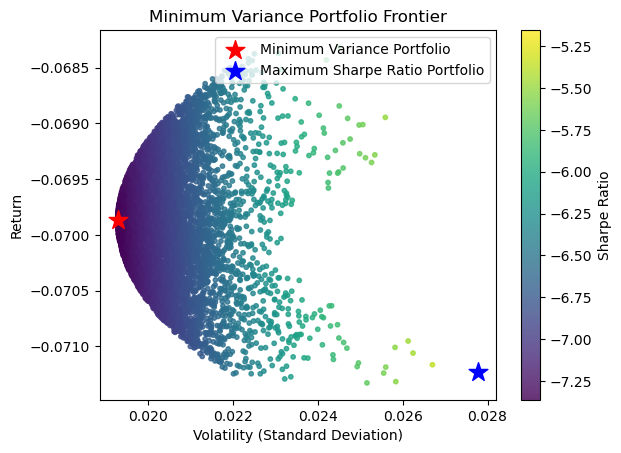

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Monthly return data for each stock
reliance_returns = np.array([-0.01415617,-0.032420931,-0.013794097,0.043723785,-0.028965066,-0.002202556,0.030256943,0.005666828,0.090006637,0.008170047,0.01471766,-0.020069427,-0.038707571,0.003551734,-0.008023552,0.005659079,-0.025618916,0.022131501,0.004884447,0.026652926,0.016783624,0.041981001,0.057217046,-0.018037054,0.021965127,0.035515322,0.025422887,0.032312509,-0.000373352,-0.027611236,-0.039046787,0.015438405,-0.014246662,-0.043570878,0.016393377,-0.010464239,-0.014225645,-0.018186838,0.01743495,0.023723798,0.024716537,0.004952097,-0.063276476,0.004363877,-0.001590046,0.018720562,-0.028199007,0.01060682,-0.017647006,0.039122703,0.050668308,0.038260377,-0.008420384,-0.017390528,0.043517357,0.030409128,-0.032228548,-0.089698899,0.026602821,0.031097288,0.033129885,0.025181349,-0.055211441,-0.034296268,0.000563371,-0.045988406,-0.001450596,0.027155163,-0.010097994,0.051335212,0.007387103,0.022281031,-0.005792395,-0.01804762,-0.000389305,-0.002720108,-0.033778155,-0.052098913,0.019898558,-0.012865251,0.03581524,0.003828006,0.031786596,0.019047473,-0.00024776,-0.011257551,0.054940355,-0.023444005,-0.021611207,-0.008650486,-0.014217104,-9.83825E-05,-0.006468478,-0.024727662,-0.029224395,-0.020978185,-0.004060493,0.028875087,-0.002089094,-0.019630223,0.011785606,-0.055220136,-0.004263697,0.010258689,0.030505244,0.003389504,0.00431925,0.011742913,0.024494315,0.018216997,-0.012512821,0.003087001,0.010730051,0.000599234,0.019938462,0.002884665,-0.013855588,0.040062509,0.051472443,0.051472443])
icicbank_returns = np.array([-0.039218058,-0.019817489,0.011842278,0.067559743,-0.008858321,0.004161547,0.0403683,0.03198079,0.002677099,-0.015905679,-0.005902816,-0.004438306,0.007088727,0.012513744,0.021635195,-0.004642436,0.03738876,0.024168207,0.004835517,-0.010728963,0.00019829,0.038285621,-0.000829732,-0.006274787,-0.003192525,-0.004300779,-0.016316171,0.023078778,0.049034129,0.089954237,-0.034866794,-0.017928974,-0.017795662,-0.023701477,-0.037665691,0.030495883,0.006380198,-0.030685501,0.016934399,0.058153326,0.046532283,-0.005910089,-0.023863567,0.014249773,-0.012205258,-0.047608711,-0.028140393,-0.03671014,-0.06213954,0.054267246,0.006697174,0.020185199,0.029841996,0.020325877,-0.005224183,-0.015034709,-0.024808932,-0.037098944,-0.002511032,0.02834986,0.04006577,-0.022612023,-0.067201109,0.015968855,0.017158901,0.033786758,0.033025799,0.035187862,0.027438898,0.022930915,0.041788145,0.028310546,-0.014856877,0.006837286,0.018166893,0.026577579,-0.009946232,-0.056435275,0.019944998,-0.002402416,0.028466255,0.029645661,-0.014999549,0.004533975,0.000841814,0.017670347,0.014150636,-0.014473813,-0.009614673,-0.025977456,0.003065888,-0.008844123,-0.026642462,0.000299846,-0.015738096,-0.010275333,0.012968641,0.008989429,-0.021969921,0.015290794,0.001854286,-0.036309762,0.026686647,0.007658105,0.026692249,0.004237482,0.010281751,0.021916424,0.010417917,0.015996579,0.008659056,0.000570405,-0.002844601,-0.003500794,-0.005306281,-0.012351354,0.009722414,0.017675101,0.000515547,0.000515547])
infosys_returns = np.array([0.029316421,-0.029930187,-0.025348272,0.001517647,-0.003208353,-0.014216463,0.008724282,0.031439845,0.013722578,0.021991757,0.044933092,0.031044233,0.025194083,-0.001843986,-0.002999578,0.004416327,0.025070571,0.024596814,0.021627998,0.025869752,-0.001032073,-0.018669069,0.00651499,-0.00521153,0.017128098,-0.022115103,0.002260226,0.004877334,0.044717715,-0.036419443,0.001715334,0.025772533,0.022554906,-0.037237979,0.000156824,0.008709956,0.016045826,0.03702921,0.028424786,-0.015614431,0.014515162,-0.007814794,-0.090400089,0.02835402,-0.01312853,-0.008703511,-0.000565056,-0.000287064,0.045699272,0.039651957,0.003590077,0.010413679,-0.029537168,-0.048549662,-0.094135259,-0.01647278,-0.011456231,-0.011983791,-0.035091076,-0.026555635,0.053657232,0.000783991,-0.062594526,0.01725753,0.022599352,0.014762774,-0.034509968,0.042484838,-0.004746584,0.05002931,0.021050029,-0.008292689,-0.036139298,-0.047281426,0.002955519,0.0006518,-0.066930621,0.013136323,0.025637006,0.00660002,0.036927719,0.021513888,0.01940538,-0.012442995,0.044886695,0.004879508,0.022312747,-0.016611605,-0.036204765,-0.028502772,0.00129831,-0.011732551,-0.007442205,0.035158825,0.003604288,0.013442117,0.017962906,-0.000622962,-0.013721489,-0.051158234,-0.000567726,-0.046856251,-0.022902556,0.004853895,0.01724314,-0.004205561,-0.130374258,-0.00369192,0.027353029,-0.007622684,-0.002606213,0.035767976,0.017452588,-0.004978909,0.008443984,-0.005008154,0.001843237,0.037260763,0.015086545,0.015086545])
HDFC_returns = np.array([-0.033116803,-0.022344729,0.00253848,0.021681703,-0.025876353,-0.001263065,0.040943542,0.019895894,0.013462313,-0.016344842,-0.004099606,0.010638933,0.002927169,0.016353788,-0.008073786,-0.03706792,-0.016772089,0.02270045,0.031544477,0.007556901,0.019934995,0.01914639,-0.005572116,-0.00727961,0.003081317,0.0245895,-0.000299617,0.028130167,0.018301315,-0.031590683,-0.017959251,-0.019637492,-0.014115858,-0.020219399,-0.003449504,0.012385249,-0.01930688,-0.03965809,0.015267157,0.052911442,0.006663175,-0.020196563,-0.027841953,0.021697987,-0.010875477,0.007274503,-0.015654486,-0.067945506,-0.015907704,0.061226632,0.012350198,0.00060661,0.067116831,-0.055406678,-0.084624872,0.006487401,-0.011496712,-0.022910913,-0.002567773,0.025583426,0.035176075,-0.016463961,-0.047956088,0.024374084,0.01042036,0.018289447,-0.000509379,-0.00803934,0.033467016,0.017327529,0.028201077,0.019738818,-0.024503322,0.002040107,0.014708176,0.011437917,-0.009978414,-0.060683583,0.018836935,-0.015388093,0.024961944,0.006180366,0.033431174,0.021349148,0.05164912,-0.008020704,-0.000143162,0.006446142,0.017246628,-0.014732801,0.006682981,-0.010793615,-0.014405428,0.02234565,0.018842029,-0.022437239,0.019573204,0.006618434,-0.027932351,-0.012726972,0.013128512,-0.037391487,0.00530048,0.011469745,0.035485829,0.018820271,-0.004239384,0.006484943,0.002928308,-0.018617861,0.008056487,-0.014064155,-0.003188804,-0.007789483,-0.004986991,0.017798683,0.022288442,0.01657476,-0.027975298,-0.027975298])

# Market return data
market_returns = np.array([-0.003016814,-0.020692392,-0.007762898,0.025032624,0.002886416,0.011658828,0.016893677,0.017915304,0.020582501,0.01445834,0.000453537,-0.001572728,0.000873795,0.006126944,0.006611668,-0.003091624,0.001199708,0.02113122,0.001623729,0.007679614,0.001529871,0.035751365,0.014816428,0.011703152,0.003355103,0.003681306,0.010718697,0.021241817,0.002715756,-0.019443913,1.95386E-06,0.012675174,-0.002955444,-0.030929063,-0.01435874,0.011940781,-0.001839727,-0.025116534,0.020107356,0.029981914,0.02051801,-0.009988897,-0.04879727,0.025040138,-0.010710048,-0.017121548,-0.026511038,-0.012446974,-0.014169501,0.036160949,0.015522897,0.012781783,0.030868353,-0.00783705,-0.021211697,-0.005754476,-0.026501195,-0.050241685,0.00444121,-0.001379074,0.026358051,-0.013801019,-0.049536439,-0.008003886,0.020579521,0.015539806,0.010595136,0.02753612,0.014154626,0.035241364,0.011682567,0.017873872,-0.015057424,0.005382858,0.012397741,0.011224612,-0.015356926,-0.040167768,0.015016376,-0.007650217,0.015751292,0.010958435,0.018513427,0.004698565,0.004053029,-0.003156387,0.020345079,-0.000435278,-0.004533022,-0.020817738,-0.00329571,-0.001279393,-0.005593694,0.00303509,-0.011602524,-0.021384196,0.006314048,0.001149395,-0.015385748,-0.010308659,0.013779007,-0.030468742,-0.000187819,-0.002069211,0.02381378,0.013402892,-0.001007327,0.010803777,0.018474316,0.009081352,-0.000486029,0.007469684,0.013948731,0.0079936,0.0094843,0.005397548,0.005378577,0.021572505,0.003502371,0.003502371])

# Risk-free rate
rf_rate = 7.2 / 100

# Concatenate all the returns into a DataFrame
data = pd.DataFrame({
    'Reliance': reliance_returns,
    'ICIC': icicbank_returns,
    'INFOSYS': infosys_returns,
    'HDFC': HDFC_returns,
    'Nifty': market_returns
})

# Calculate excess returns
excess_returns = data.sub(rf_rate, axis=0)

# Calculate covariance matrix
cov_matrix = excess_returns.iloc[:, :-1].cov()

# Function to calculate portfolio volatility
def calculate_volatility(weights, cov_matrix):
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return np.sqrt(portfolio_variance)

# Function to minimize portfolio volatility
def minimize_volatility(weights, cov_matrix):
    return calculate_volatility(weights, cov_matrix)

# Generate a range of portfolio weights
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
risk_free_rate = 0.072  # 3.5%

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights /= np.sum(weights)
   
    portfolio_return = np.dot(weights, excess_returns.iloc[:, :-1].mean())
    portfolio_volatility = calculate_volatility(weights, cov_matrix)
   
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility

# Extract the minimum variance portfolio
min_volatility_index = np.argmin(results[1])
min_volatility_portfolio = results[:, min_volatility_index]

# Extract the maximum Sharpe ratio portfolio
max_sharpe_ratio_index = np.argmax(results[2])
max_sharpe_ratio_portfolio = results[:, max_sharpe_ratio_index]

# Plotting the minimum variance portfolio frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.8)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='red', marker='*', s=200, label='Minimum Variance Portfolio')
plt.scatter(max_sharpe_ratio_portfolio[1], max_sharpe_ratio_portfolio[0], color='blue', marker='*', s=200, label='Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Minimum Variance Portfolio Frontier')
plt.legend()
plt.show()

In [59]:
import numpy as np
import statsmodels.api as sm

# Create a matrix of independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Add a constant term to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Create a model with the market returns as the dependent variable
model = sm.OLS(market_returns, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     96.20
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           9.22e-36
Time:                        13:17:36   Log-Likelihood:                 405.59
No. Observations:                 120   AIC:                            -801.2
Df Residuals:                     115   BIC:                            -787.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.761      0.4

In [60]:
import numpy as np

# Create a matrix of independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Print the correlation matrix
print(correlation_matrix)

[[1.         0.35636446 0.28223669 0.32459438]
 [0.35636446 1.         0.15703731 0.53857833]
 [0.28223669 0.15703731 1.         0.33278923]
 [0.32459438 0.53857833 0.33278923 1.        ]]


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF values
for i in range(1, len(vif)):
    print(f"VIF for X{str(i)}:", vif[i])

VIF for X1: 1.5000990117096762
VIF for X2: 1.1762869443421615
VIF for X3: 1.558043493886006


In [62]:
import numpy as np
import statsmodels.api as sm

# Define the independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Define the dependent variable (market returns)
Y = market_returns

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Calculate the F-statistic and p-value
F_statistic = model.fvalue
p_value = model.f_pvalue

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")

# Check if the F-statistic is statistically significant
if p_value < alpha:
    print("Reject the null hypothesis: The regression model is significant.")
else:
    print("Fail to reject the null hypothesis: The regression model is not significant.")

F-statistic: 96.20263094437414
P-value: 9.217770775094959e-36
Reject the null hypothesis: The regression model is significant.


In [63]:
import numpy as np
import statsmodels.api as sm

# Define the independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Define the dependent variable (market returns)
Y = market_returns

# Define the break point (the index at which you split the data)
break_point = 64  # You can adjust this based on your data

# Split the data into two subperiods
X1 = X[:break_point]
Y1 = Y[:break_point]
X2 = X[break_point:]
Y2 = Y[break_point:]

# Estimate separate regression models for the two subperiods
model1 = sm.OLS(Y1, X1).fit()
model2 = sm.OLS(Y2, X2).fit()

# Calculate the sum of squared residuals for the two subperiods
SSR1 = np.sum(model1.resid ** 2)
SSR2 = np.sum(model2.resid ** 2)

# Estimate the pooled regression model
model_pooled = sm.OLS(Y, X).fit()

# Calculate the sum of squared residuals for the pooled model
SSR_pooled = np.sum(model_pooled.resid ** 2)

# Calculate the Chow statistic
k1 = X1.shape[1]
k2 = X2.shape[1]
k_pooled = X.shape[1]
n = len(Y)

chow_statistic = ((SSR_pooled - SSR1 - SSR2) / (k1 + k2)) / ((n - k_pooled) / (SSR1 + SSR2))

# Calculate the degrees of freedom
df1 = 2
df2 = n - k_pooled

# Calculate the F-statistic
F_statistic = chow_statistic * (df2 / df1)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"F-statistic (Chow): {F_statistic}")
print(f"Degrees of freedom (numerator): {df1}")
print(f"Degrees of freedom (denominator): {df2}")

# Calculate the critical value from the F-distribution table
from scipy.stats import f

critical_value = f.ppf(1 - alpha, df1, df2)

print(f"Critical value: {critical_value}")

# Compare the F-statistic with the critical value
if F_statistic > critical_value:
    print("Reject the null hypothesis: There is evidence of a structural break.")
else:
    print("Fail to reject the null hypothesis: No evidence of a structural break.")

F-statistic (Chow): 1.8442520096293045e-07
Degrees of freedom (numerator): 2
Degrees of freedom (denominator): 115
Critical value: 3.0751437334208416
Fail to reject the null hypothesis: No evidence of a structural break.


In [64]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Define the independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Define the dependent variable (market returns)
Y = market_returns

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the residuals
residuals = model.resid

# Estimate a new regression model using squared residuals as the dependent variable
squared_residuals = residuals**2
model_squared_residuals = sm.OLS(squared_residuals, X).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model_squared_residuals.resid, X)

# Extract the test statistics and p-values
test_statistic = bp_test[0]
p_value = bp_test[1]

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Breusch-Pagan Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")


Breusch-Pagan Test Statistic: 15.340658421166884
P-value: 0.004044398469062965
Reject the null hypothesis: Heteroscedasticity is present.


In [68]:
import numpy as np
import statsmodels.api as sm

# Define the independent variables (equity returns)
X = np.column_stack((reliance_returns, icicbank_returns, infosys_returns, HDFC_returns))

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Define the dependent variable (market returns)
Y = market_returns

# Fit the original regression model
model = sm.OLS(Y, X).fit()

# Get the residuals from the original model
residuals = model.resid

# Obtain the fitted values (predicted values) from the original model
fitted_values = model.fittedvalues

# Create squared and cubed terms of the fitted values
fitted_values_squared = fitted_values ** 2
fitted_values_cubed = fitted_values ** 3

# Stack the squared and cubed terms with the original independent variables
X_with_squared_cubed = np.column_stack((X, fitted_values_squared, fitted_values_cubed))

# Fit the new regression model with squared and cubed terms
model_with_squared_cubed = sm.OLS(Y, X_with_squared_cubed).fit()

# Calculate the residuals from the new model
residuals_with_squared_cubed = model_with_squared_cubed.resid

# Calculate the RSS (Residual Sum of Squares) for both models
rss_original = np.sum(residuals**2)
rss_with_squared_cubed = np.sum(residuals_with_squared_cubed**2)

# Calculate the degrees of freedom
n = len(Y)
k_original = X.shape[1]  # Number of parameters in the original model
k_with_squared_cubed = X_with_squared_cubed.shape[1]  # Number of parameters in the new model

# Calculate the F-statistic for the Ramsey RESET test
f_statistic = ((rss_original - rss_with_squared_cubed) / (k_with_squared_cubed - k_original)) / (rss_with_squared_cubed / (n - k_with_squared_cubed))

# Calculate the p-value for the F-statistic
from scipy.stats import f
p_value = 1 - f.cdf(f_statistic, k_with_squared_cubed - k_original, n - k_with_squared_cubed)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Ramsey RESET Test F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There may be a misspecification error.")
else:
    print("Fail to reject the null hypothesis: No evidence of misspecification error.")


Ramsey RESET Test F-statistic: 2.6178895970980376
P-value: 0.07737812495750451
Fail to reject the null hypothesis: No evidence of misspecification error.
